<a href="https://colab.research.google.com/github/chani723/2020-2-AI/blob/master/code/05_mnist_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

# 층을 차례대로 쌓아 tf.keras.models.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 선택
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 모델 요약 표시
model.summary()

# 모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=5)

# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2997 - accuracy: 0.9129
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1438 

[0.07504831254482269, 0.9764000177383423]

In [4]:
#테스트 데이터의 첫 번째 손글씨 예측 결과를 확인
print(x_test[:1].shape)

pred_result = model.predict(x_test[:1])
print(pred_result.shape)
print(pred_result)
print(pred_result[0])

(1, 28, 28)
(1, 10)
[[6.2432484e-08 1.7006195e-07 4.9847581e-06 3.4986567e-04 8.8390399e-11
  8.6972170e-07 1.5088271e-12 9.9963939e-01 1.4214602e-07 4.4518556e-06]]
[6.2432484e-08 1.7006195e-07 4.9847581e-06 3.4986567e-04 8.8390399e-11
 8.6972170e-07 1.5088271e-12 9.9963939e-01 1.4214602e-07 4.4518556e-06]


In [5]:
import numpy as np

#10개의 수를 더하면?
one_pred= pred_result[0]
print(one_pred.sum())

#혹시 가장 큰 수가 있는 첨자가 결과
one = np.argmax(one_pred)
print(one)

0.99999994
7


In [6]:
import numpy as np

#10개의 수를 더하면?
print(tf.reduce_sum(one_pred))
print(tf.reduce_sum(one_pred).numpy())

#혹시 가장 큰 수가 있는 첨자가 결과
print(tf.argmax(one_pred).numpy())

tf.Tensor(0.99999994, shape=(), dtype=float32)
0.99999994
7


In [7]:
import numpy as np

#######################################
# 원핫 인코딩과 argmax 학습
print(np.argmax([5, 4, 10, 1, 2]))
print(np.argmax([3, 1, 4, 9, 6, 7, 2]))
print(np.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))

2
3
[1 0 2]


In [8]:
import numpy as np

#######################################
# 원핫 인코딩과 argmax 학습
print(tf.argmax([5, 4, 10, 1, 2]))
print(tf.argmax([3, 1, 4, 9, 6, 7, 2]))
print(tf.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor([1 0 2], shape=(3,), dtype=int64)


0.99999994
7


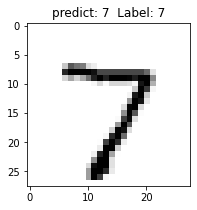

In [9]:
import numpy as np

#10개의 수를 더하면?
one_pred= pred_result[0]
print(one_pred.sum())

#혹시 가장 큰 수가 있는 첨자가 결과
one = np.argmax(one_pred)
print(one)

import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
tmp = "predict: " + str(one) + "  Label: " + str(y_test[0])
plt.title(tmp)
plt.imshow(x_test[0], cmap='Greys')
#_ = plt.imshow(x_test[0], cmap='Greys') #-> 그림만 나오게

In [10]:
###############################################
# 간단한 자료 처리
import numpy as np

x = np.array([2, 3, 254, 5, 6, 3])
x = x / 255.0
print(x)

x = x.reshape(2, 3)
print(x)

x = x.flatten()
print(x)

[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]
[[0.00784314 0.01176471 0.99607843]
 [0.01960784 0.02352941 0.01176471]]
[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]


In [11]:
data = np.arange(1, 11).reshape(5, 2).astype(np.float32)
print(data)
np.sum(data)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]]


55.0

In [12]:
tf.random.set_seed(0)
#layer = tf.keras.layers.Dropout(.2, input_shape=(2,))
layer = tf.keras.layers.Dropout(.3, input_shape=(2,))
outputs = layer(data, training= True)
#outputs = layer(data, training= false)
print(outputs)
np.sum(outputs)

tf.Tensor(
[[ 0.         0.       ]
 [ 4.285714   5.714286 ]
 [ 7.1428576  8.571428 ]
 [10.        11.428572 ]
 [12.857143   0.       ]], shape=(5, 2), dtype=float32)


60.0

In [13]:
from random import sample
import numpy as np

# x_test로 직접 결과 처리
pred_result = model.predict(x_test)
print(pred_result.shape)
print(pred_result[0])
print(np.argmax(pred_result[0]))

#%%
# 원핫 인토딩을 일반 데이터로 변환
pred_labels = np.argmax(pred_result, axis=1)
# 예측한 답 출력
print(pred_labels)
# 실제 정답 출력
print(y_test)
###############################################

(10000, 10)
[6.2432363e-08 1.7006163e-07 4.9847536e-06 3.4986532e-04 8.8390233e-11
 8.6972005e-07 1.5088242e-12 9.9963939e-01 1.4214562e-07 4.4518474e-06]
7
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


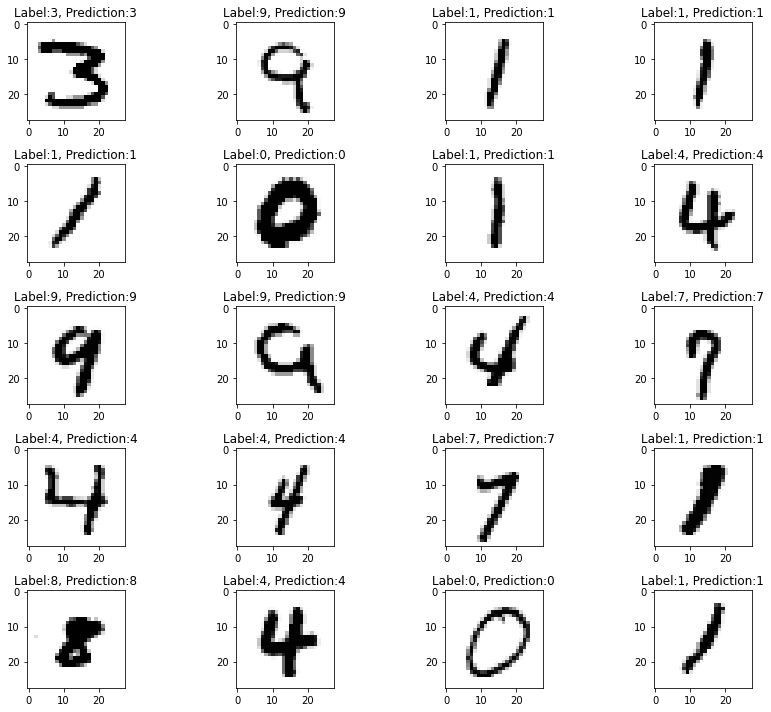

In [14]:
###############################################
from random import sample
import numpy as np

# 예측한 softmax의 확률이 있는 리스트 pred_result
pred_result = model.predict(x_test)

# 실제 예측한 정답이 있는 리스트 pred_labels
pred_labels = np.argmax(pred_result, axis=1)

#랜덤하게 20개의 훈련용 자료를 예측 값과 정답, 그림을 그려 보자.
nrows, ncols = 5, 4
samples = sorted(sample(range(len(x_test)), nrows * ncols)) # 출력할 첨자 선정

# 임의의 20개 그리기
count = 0
plt.figure(figsize=(12,10))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    # 예측이 틀린 것은 파란색으로 그리기 
    cmap = 'Greys' if ( pred_labels[n] == y_test[n]) else 'Blues'
    plt.imshow(x_test[n].reshape(28, 28), cmap=cmap, interpolation='nearest')
    tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()
###############################################

정답이 틀린 수 236
[9779, 3559, 2607, 1952, 3005, 5642, 9019, 6059, 4860, 619, 9015, 8094, 4093, 9839, 2024, 3941, 2130, 8408, 4449, 4823]


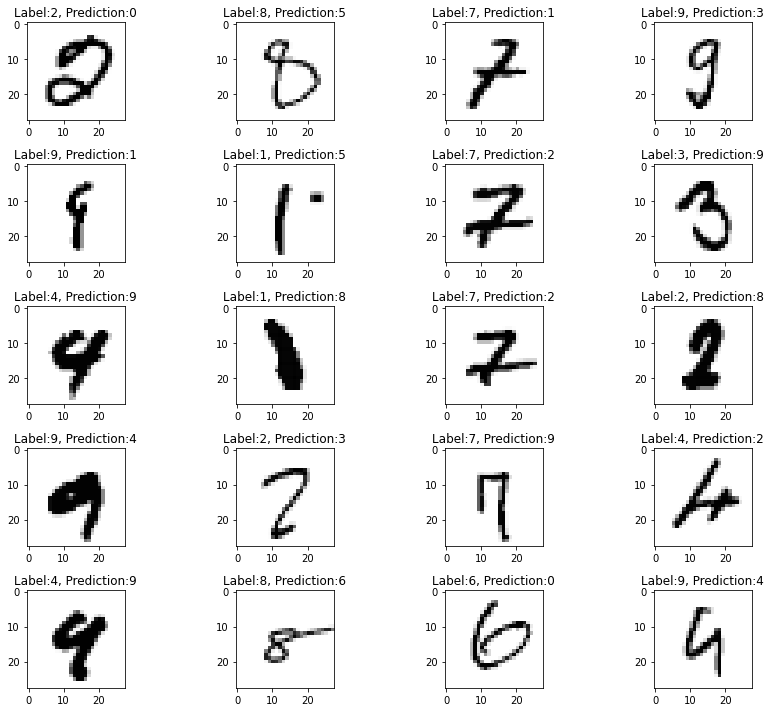

In [15]:
from random import sample
import numpy as np

###############################################
# 예측 틀린 것 첨자를 저장할 리스트
mispred = []
# 예측한 softmax의 확률이 있는 리스트 pred_result
pred_result = model.predict(x_test)

# 실제 예측한 정답이 있는 리스트 pred_labels
pred_labels = np.argmax(pred_result, axis=1)

for n in range(0, len(y_test)):
    if pred_labels[n] != y_test[n]:
        mispred.append(n)
print('정답이 틀린 수', len(mispred))

# 랜덤하게 틀린 것 20개의 첨자 리스트 생성
samples = sample(mispred, 20)
print(samples)

# 틀린 것 20개 그리기
count = 0
nrows, ncols = 5, 4
plt.figure(figsize=(12,10))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()
###############################################

In [16]:
#########################################################
import tensorflow as tf

# mnist 모듈 준비
mnist = tf.keras.datasets.mnist

# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0


# 층을 차례대로 쌓아 tf.keras.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')                                     
])

# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 선택
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 표시
model.summary()

# 모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=10)

# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1420 - accuracy: 0.9579
Epoch 3/10
1875/1875 [====================

[0.07338511943817139, 0.9783999919891357]

In [17]:
#########################################################
import tensorflow as tf

# mnist 모듈 준비
mnist = tf.keras.datasets.mnist

# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0


# 층을 차례대로 쌓아 tf.keras.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')                                     
])

# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 선택
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 표시
model.summary()

# 모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=20)

# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

[0.08310713618993759, 0.9797999858856201]

In [18]:
#########################################################
import tensorflow as tf

# mnist 모듈 준비
mnist = tf.keras.datasets.mnist

# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0


# 먼저 reshape ()로 평탄화 작업을 수행한 후
x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

#층을 차례대로 쌓아 tf.keras.models.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')                                     
])

# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 선택
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 표시
model.summary()

# 모델을 훈련 데이터로 총 5번 훈련
model.fit(x_train, y_train, epochs=20)

# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2987 - accuracy: 0.9131
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1458 - accuracy: 0.9565
Epoch 3/20
1875/1875 [====================

[0.07601641118526459, 0.9811999797821045]